In [35]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import torch
import numpy as np
from transformer_lens import HookedTransformer
from transformers import AutoModelForCausalLM
import os
import json
os.environ['http_proxy'] = "http://10.176.52.116:7890"
os.environ['https_proxy'] = "http://10.176.52.116:7890"
os.environ['all_proxy'] = "socks5://10.176.52.116:7891"

/remote-home/miintern1/anaconda3/envs/watermark/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/remote-home/miintern1/anaconda3/envs/watermark/lib/python3.11/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/remote-home/miintern1/anaconda3/envs/watermark/lib/python3.11/site-packages/torch/cuda/__init__.py:749: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return

In [9]:
with open("/remote-home/miintern1/watermark-learnability/data/c4/paraphrased_results.json","r") as f:
    data = json.load(f)
original_text = data['original_text']
paraphrased_text = data['paraphrased_text']
for a,b in zip(original_text,paraphrased_text):
    print(a.replace('\n', ''))
    print("")
    print(b)
    
    break

Cluster comprises IBM's Opteron-based eServer 325 server and systems management software and storage devices that can run Linux and Windows operating systems.IBM on Tuesday announced a prepackaged and pretested cluster that is powered by Advanced Micro Devices Inc.s 64-bit Opteron processor.IBM, of Armonk, N.Y., is combining its Opteron-based eServer 325 server—which targets scientific and technical computing users—with systems management software and storage devices to offer a bundled package that can run Linux and Windows operating systems.The new offering, which will be available later this month or in early December, is part of IBMs eServer Cluster 1350, which also includes bundles based on the companys BladeCenter blade servers and two-processor x335 and x345 systems using Intel Corp.s 32-bit Xeon chips.Clusters comprise multiple servers tied together to create a supercomputing environment for users. In a related move, IBM last week announced that it was teaming with Corning Inc.,

In [2]:

hf_model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf") # , local_files_only=True
model = HookedTransformer.from_pretrained('Llama-2-7b', device="cpu", hf_model=hf_model)
model.eval()


Loading checkpoint shards:  50%|█████     | 1/2 [00:02<00:02,  2.21s/it]


KeyboardInterrupt: 

In [34]:
hf_model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf") # , local_files_only=True
model = HookedTransformer.from_pretrained('Llama-2-7b', device="cpu", hf_model=hf_model)
model.eval()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loaded pretrained model Llama-2-7b into HookedTransformer


HookedTransformer(
  (embed): Embed()
  (hook_embed): HookPoint()
  (blocks): ModuleList(
    (0-31): 32 x TransformerBlock(
      (ln1): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (ln2): RMSNormPre(
        (hook_scale): HookPoint()
        (hook_normalized): HookPoint()
      )
      (attn): Attention(
        (hook_k): HookPoint()
        (hook_q): HookPoint()
        (hook_v): HookPoint()
        (hook_z): HookPoint()
        (hook_attn_scores): HookPoint()
        (hook_pattern): HookPoint()
        (hook_result): HookPoint()
        (hook_rot_k): HookPoint()
        (hook_rot_q): HookPoint()
      )
      (mlp): GatedMLP(
        (hook_pre): HookPoint()
        (hook_pre_linear): HookPoint()
        (hook_post): HookPoint()
      )
      (hook_attn_in): HookPoint()
      (hook_q_input): HookPoint()
      (hook_k_input): HookPoint()
      (hook_v_input): HookPoint()
      (hook_mlp_in): HookPoint()
      (hook_attn_out): Hook

In [36]:
example_text = "Neural networks can be fully understood, let's do it!"
input_ids = model.to_tokens(example_text, prepend_bos=False)
print('tokenized results=', input_ids.cpu().tolist())

recovered_text = model.to_string(input_ids)
print(f'{recovered_text=}')

tokenized results= [[2448, 3631, 14379, 508, 367, 8072, 11098, 29892, 1235, 29915, 29879, 437, 372, 29991]]
recovered_text=["Neural networks can be fully understood, let's do it!"]


In [8]:
hf_logits = hf_model(input_ids)['logits']
logits, cache = model.run_with_cache(input_ids, return_type='logits')

print(f'{hf_logits=}')
print(f'{logits=}')

hf_logits=tensor([[[ -9.6888,  -8.8738,  -0.5533,  ...,  -4.8996,  -7.5351,  -6.8189],
         [ -9.6327, -11.9659,   2.7874,  ...,  -5.6774,  -6.4354,  -6.6760],
         [-11.1112,  -8.2295,   3.7166,  ...,  -8.4757, -10.3463,  -7.2617],
         ...,
         [ -9.6158, -10.8697,   3.3311,  ...,  -6.4159,  -7.0471,  -8.4679],
         [ -8.2840,  -6.8188,   6.9874,  ...,  -5.6472,  -7.1894,  -6.3354],
         [-13.4876,  -9.3282,   5.1343,  ...,  -7.3542,  -8.0036,  -7.1162]]])
logits=tensor([[[-5.4101, -4.5952,  3.7253,  ..., -0.6210, -3.2565, -2.5403],
         [-5.1830, -7.5161,  7.2371,  ..., -1.2276, -1.9857, -2.2262],
         [-5.2665, -2.3849,  9.5612,  ..., -2.6310, -4.5016, -1.4170],
         ...,
         [-5.7547, -7.0086,  7.1922,  ..., -2.5547, -3.1860, -4.6068],
         [-5.4391, -3.9739,  9.8322,  ..., -2.8024, -4.3446, -3.4905],
         [-6.6385, -2.4791, 11.9834,  ..., -0.5050, -1.1544, -0.2671]]],
       grad_fn=<AddBackward0>)


In [37]:
import json
with open("/remote-home/miintern1/watermark-learnability/data/c4/paraphrased_results.json","r") as f:
    raw_input = json.load(f)

In [39]:
len(raw_input['original_text'])
len(raw_input['paraphrased_text'])

200

In [28]:
def prompt_cache_analysis(original_input):
    original_input_ids = model.to_tokens(original_input, prepend_bos=False)
    original_logits, original_cache = model.run_with_cache(original_input_ids, return_type='logits')
    return original_cache, original_logits

comparison_input =  "Occasional diarrhea is a common occurrence. Most people will experience an episode of diarrhea at least once or twice a year that will disappear in a couple of days.\nLuckily, there are many foods to eat that may help a person reduce the symptoms of diarrhea. There are also some foods to avoid when dealing with a bout of diarrhea, and some additional home care tips to consider.\nAnyone who is experiencing persistent diarrhea should see a doctor, as a person may become dehydrated over time.\nDiarrhea is a bowel movement that is more liquid than solid or has a loose texture. It is a common problem and may occur a couple of times each year. Diarrhea will usually last no more than 3 days.\nSoft, bland foods, such as toast, will help to absorb excess water and ease the symptoms of diarrhea.\nPeople with chronic digestive conditions, such as irritable bowel syndrome (IBS) or Crohn's disease, may experience diarrhea more regularly.\nA person"

comparison_cache, comparison_logits = prompt_cache_analysis(comparison_input)

In [17]:
original_input_ids = model.to_tokens(original_input, prepend_bos=False)
paraphrased_input_ids = model.to_tokens(paraphrased_input, prepend_bos=False)

original_logits, original_cache = model.run_with_cache(original_input_ids, return_type='logits')
paraphrased_logits, paraphrased_cache = model.run_with_cache(paraphrased_input_ids, return_type='logits')



In [25]:
from pprint import pprint
print(paraphrased_cache['blocks.0.hook_resid_post'][:,-1,:].squeeze().shape)
pprint(list(paraphrased_cache.keys()))


torch.Size([4096])
['hook_embed',
 'blocks.0.hook_resid_pre',
 'blocks.0.ln1.hook_scale',
 'blocks.0.ln1.hook_normalized',
 'blocks.0.attn.hook_q',
 'blocks.0.attn.hook_k',
 'blocks.0.attn.hook_v',
 'blocks.0.attn.hook_rot_q',
 'blocks.0.attn.hook_rot_k',
 'blocks.0.attn.hook_attn_scores',
 'blocks.0.attn.hook_pattern',
 'blocks.0.attn.hook_z',
 'blocks.0.hook_attn_out',
 'blocks.0.hook_resid_mid',
 'blocks.0.ln2.hook_scale',
 'blocks.0.ln2.hook_normalized',
 'blocks.0.mlp.hook_pre',
 'blocks.0.mlp.hook_pre_linear',
 'blocks.0.mlp.hook_post',
 'blocks.0.hook_mlp_out',
 'blocks.0.hook_resid_post',
 'blocks.1.hook_resid_pre',
 'blocks.1.ln1.hook_scale',
 'blocks.1.ln1.hook_normalized',
 'blocks.1.attn.hook_q',
 'blocks.1.attn.hook_k',
 'blocks.1.attn.hook_v',
 'blocks.1.attn.hook_rot_q',
 'blocks.1.attn.hook_rot_k',
 'blocks.1.attn.hook_attn_scores',
 'blocks.1.attn.hook_pattern',
 'blocks.1.attn.hook_z',
 'blocks.1.hook_attn_out',
 'blocks.1.hook_resid_mid',
 'blocks.1.ln2.hook_scale',


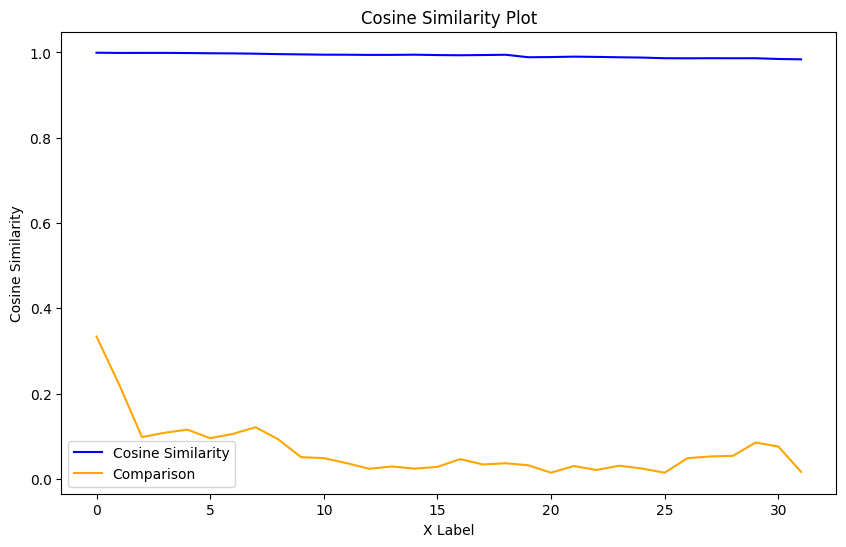

In [32]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

analyze_list = [f'blocks.{i}.hook_resid_post' for i in range(32)]
cos_sim = []
for name in analyze_list:
    cos_similarity = F.cosine_similarity(original_cache[name][:,-1,:].squeeze(), paraphrased_cache[name][:,-1,:].squeeze(), dim=-1)
    cos_sim.append(cos_similarity)

comparison_cos_sim = []
for name in analyze_list:
    cos_similarity = F.cosine_similarity(original_cache[name][:,-1,:].squeeze(), comparison_cache[name][:,-1,:].squeeze(), dim=-1)
    comparison_cos_sim.append(cos_similarity)

x_labels = list(range(32))
# plt.plot(x_labels, cos_sim)
# plt.xlabel('X Label')
# plt.ylabel('Cosine Similarity')
# plt.title('Cosine Similarity Plot')
# plt.show()

# plt.plot(x_labels, comparison_cos_sim)
# plt.xlabel('X Label')
# plt.ylabel('Cosine Similarity')
# plt.title('Cosine Similarity Plot')
# plt.show()



plt.figure(figsize=(10, 6))
plt.plot(x_labels, cos_sim, label='Cosine Similarity', color='blue')
plt.plot(x_labels, comparison_cos_sim, label='Comparison', color='orange')

plt.xlabel('X Label')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Plot')
plt.legend()

plt.show()